In [1]:
import pandas as pd

df = pd.read_csv("salaries.csv")
df.head()

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


In [18]:
inputs = df.drop("salary_more_then_100k", axis=1)
target = df["salary_more_then_100k"]


,company,job,degree
0,google,sales executive,bachelors
1,google,sales executive,masters
2,google,business manager,bachelors
3,google,business manager,masters
4,google,computer programmer,bachelors


In [23]:
from sklearn.preprocessing import LabelEncoder 

In [24]:
lab_company = LabelEncoder()
lab_job = LabelEncoder()
lab_degree = LabelEncoder()

In [26]:
inputs["n_company"] = lab_company.fit_transform(inputs["company"])
inputs["n_job"] = lab_job.fit_transform(inputs["job"])
inputs["n_degree"] = lab_job.fit_transform(inputs["degree"])



,company,job,degree,n_company,n_job,n_degree
0,google,sales executive,bachelors,2,2,0
1,google,sales executive,masters,2,2,1
2,google,business manager,bachelors,2,0,0
3,google,business manager,masters,2,0,1
4,google,computer programmer,bachelors,2,1,0


In [27]:
inputs_n = inputs.drop(["company", "job", "degree"], axis=1)

In [28]:
inputs_n.head()

,n_company,n_job,n_degree
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0


In [29]:
from sklearn import tree

In [30]:
model = tree.DecisionTreeClassifier()

In [31]:
model.fit(inputs_n, target)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [32]:
model.score(inputs_n, target)

1.0

In [33]:
model.predict([[2,2,0]])

C:\Users\Hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [ ]:
# Excercise

In [34]:
import pandas as pd

df = pd.read_csv("titanic.csv")

print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [40]:
inputs = df.drop(["PassengerId", "Name", "SibSp", "Parch", "Ticket", "Cabin", "Embarked"], axis=1)
target = df["Survived"]

inputs.head()



,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [41]:
from sklearn.preprocessing import LabelEncoder

In [42]:
lab_pclass = LabelEncoder()
lab_sex = LabelEncoder()
lab_age = LabelEncoder()
lab_fare = LabelEncoder()

In [45]:
inputs["n_pclass"] = lab_pclass.fit_transform(inputs["Pclass"])
inputs["n_sex"] = lab_sex.fit_transform(inputs["Sex"])
inputs["n_age"] = lab_age.fit_transform(inputs["Age"])
inputs["n_fare"] = lab_fare.fit_transform(inputs["Fare"])

In [46]:
inputs.head()

,Survived,Pclass,Sex,Age,Fare,n_pclass,n_sex,n_age,n_fare
0,0,3,male,22.0,7.2500,2,1,28,18
1,1,1,female,38.0,71.2833,0,0,51,207
2,1,3,female,26.0,7.9250,2,0,34,41
3,1,1,female,35.0,53.1000,0,0,47,189
4,0,3,male,35.0,8.0500,2,1,47,43


In [48]:
n_inputs = inputs.drop(["Survived", "Pclass", "Sex", "Age", "Fare"], axis=1)

In [49]:
n_inputs.head()

,n_pclass,n_sex,n_age,n_fare
0,2,1,28,18
1,0,0,51,207
2,2,0,34,41
3,0,0,47,189
4,2,1,47,43


In [50]:
from sklearn import tree

In [51]:
model = tree.DecisionTreeClassifier()

In [52]:
model.fit(n_inputs, target)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [53]:
model.score(n_inputs, target)

0.9797979797979798

In [55]:
model.predict([[2,1,28, 18]])

C:\Users\Hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [57]:
model.predict([[0, 0, 51, 207]])

C:\Users\Hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

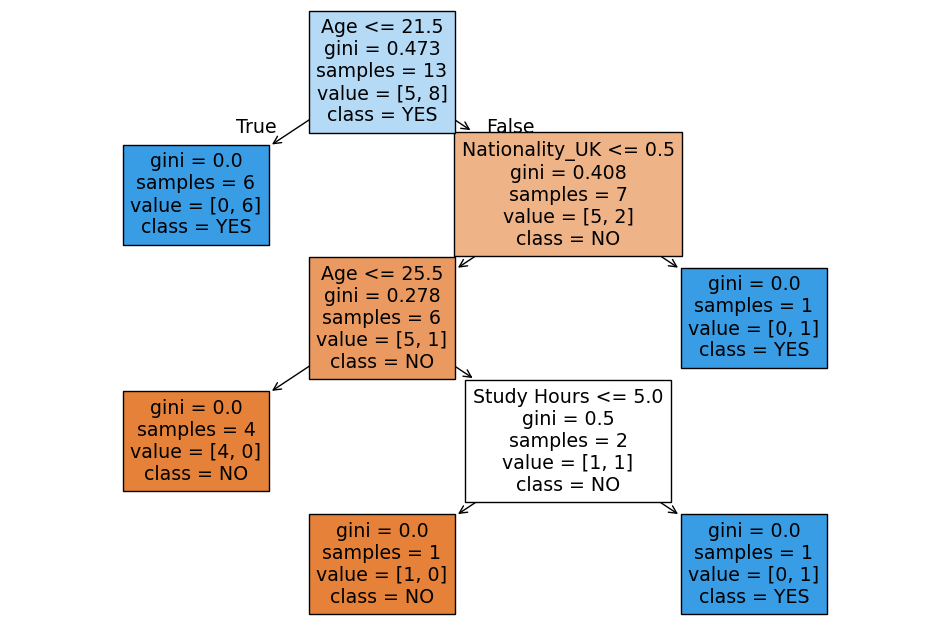

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt
# Step 1: Load the dataset
data = {
'Age': [18, 22, 20, 25, 21, 19, 23, 26, 20, 22, 24, 27, 21],
'Study Hours': [15, 8, 12, 7, 20, 14, 10, 6, 11, 5, 9, 4, 16],
'Grade': ['A', 'B', 'B', 'C', 'A', 'B', 'C', 'A', 'B', 'C', 'A', 'B', 'A'],
'Nationality': ['UK', 'USA', 'N', 'USA', 'UK', 'UK', 'N', 'USA', 'N', 'N', 'UK', 'USA', 'N'],
'Pass': ['YES', 'NO', 'YES', 'NO', 'YES', 'YES', 'NO', 'YES', 'YES', 'NO', 'YES', 'NO', 'YES']
}
df = pd.DataFrame(data)
# Step 2: Prepare the data
X = df[['Age', 'Study Hours', 'Grade', 'Nationality']]
y = df['Pass'] # Convert categorical variables to numerical
X = pd.get_dummies(X, drop_first=True)
#Step 3: Create the decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X, y)
# Step 4: Visualize the decision tree
plt.figure(figsize=(12,8))
tree.plot_tree(clf, feature_names=X.columns, class_names=['NO','YES' ], filled=True)
plt.show()

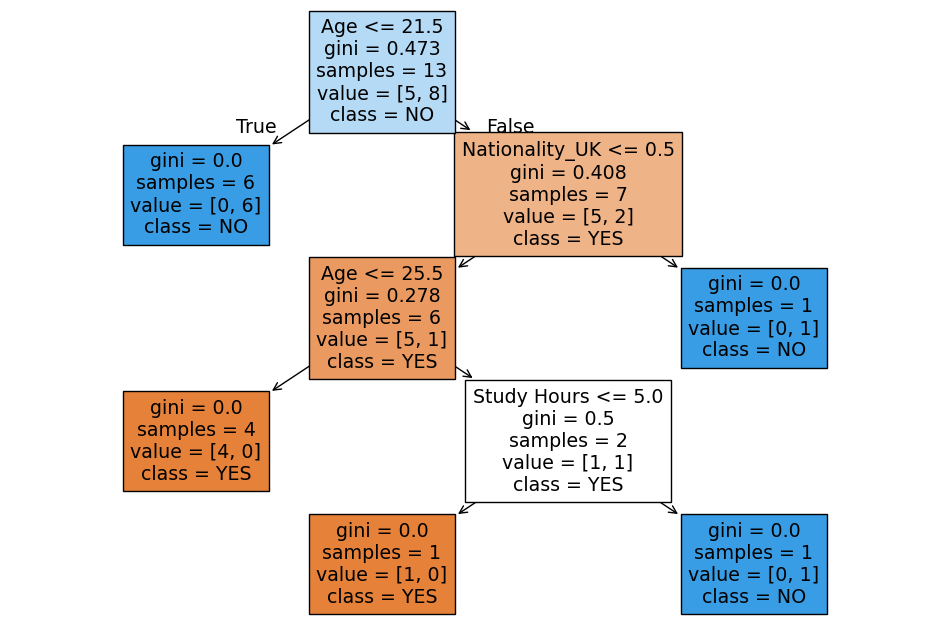

In [13]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

# Step 1: Load the dataset
data = {
	'Age' : [18, 22, 20, 25, 21, 19, 23, 26, 20, 22, 24, 27, 21],
	'Study Hours' : [15, 8, 12, 7, 20, 14, 10, 6, 11, 5, 9, 4, 16],
    'Grade' : ['A', 'B', 'B', 'C', 'A', 'B', 'C', 'A', 'B', 'C', 'A', 'B', 'A'],
    'Nationality' : ['UK', 'USA', 'N', 'USA', 'UK', 'UK', 'N', 'USA', 'N', 'N', 'UK', 'USA', 'N'],
    'Pass' : ['YES', 'NO', 'YES', 'NO', 'YES', 'YES', 'NO', 'YES', 'YES', 'NO', 'YES', 'NO', 'YES']
}

df = pd.DataFrame(data)

# Step 2: Prepare the data
X = df[['Age', 'Study Hours', 'Grade', 'Nationality']]
y = df['Pass']

X = pd.get_dummies(X, drop_first=True) # convert the categorical to numerical

# Step 3: Create the decision tree classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X, y)

# Step 4: Visualize the decision tree
plt.figure(figsize=(12, 8))
tree.plot_tree(dt, feature_names=X.columns, class_names=["YES", "NO"], filled=True)
plt.show()





